In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv("House-Price.csv")
data.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [2]:
# Calculate the relative frequencies of existing categories
import numpy as np
relative_frequencies = data['waterbody'].value_counts(normalize=True)

# Impute missing values based on the relative frequencies
data['waterbody'].fillna(pd.Series(np.random.choice(relative_frequencies.index, p=relative_frequencies, size=len(data))), inplace=True)
data.waterbody.value_counts()

waterbody
River             261
Lake              142
Lake and River    103
Name: count, dtype: int64

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'Water body' is the column with categorical values
encoder = OneHotEncoder(sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(data[['waterbody']]), columns=encoder.get_feature_names_out(['waterbody']))
data = pd.concat([data, df_encoded], axis=1)
#df.drop('Water body', axis=1, inplace=True)
data.head()

C:\Users\USER\anaconda3.2\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,...,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,...,5.480,11.1920,River,23,YES,0.049347,0,0.0,0.0,1.0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,...,7.332,12.1728,Lake,42,YES,0.046146,1,1.0,0.0,0.0
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,...,7.394,101.1200,Lake,38,YES,0.045764,0,1.0,0.0,0.0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,...,9.268,11.2672,Lake,45,YES,0.047151,0,1.0,0.0,0.0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,...,8.824,11.2896,Lake,55,YES,0.039474,0,1.0,0.0,0.0


In [4]:
data['room_num'] = data['room_num'].round()
data['n_hot_rooms'] = data['n_hot_rooms'].round()
data['n_hos_beds'] = data['n_hos_beds'].round()


In [5]:
data['room_num'] = data['room_num'].astype(int)
data['n_hot_rooms'] = data['n_hot_rooms'].astype(int)

In [6]:
# Replace NaN values with a default value (e.g., 0)
data['n_hos_beds'].fillna(0, inplace=True)

# Replace infinite values with a default value (e.g., 0)
data['n_hos_beds'].replace([np.inf, -np.inf], 0, inplace=True)

# Convert the column to integers
data['n_hos_beds'] = data['n_hos_beds'].astype(int)


In [9]:
import pandas as pd

# Assuming df is your DataFrame
pd.set_option('display.max_columns', None)
print(data.head())


   price  resid_area  air_qual  room_num   age  dist1  dist2  dist3  dist4  \
0   24.0       32.31     0.538         7  65.2   4.35   3.81   4.18   4.01   
1   21.6       37.07     0.469         6  78.9   4.99   4.70   5.12   5.06   
2   34.7       37.07     0.469         7  61.1   5.03   4.86   5.01   4.97   
3   33.4       32.18     0.458         7  45.8   6.21   5.93   6.16   5.96   
4   36.2       32.18     0.458         7  54.2   6.16   5.86   6.37   5.86   

   teachers  poor_prop airport  n_hos_beds  n_hot_rooms waterbody  rainfall  \
0      24.7       4.98     YES           5           11     River        23   
1      22.2       9.14      NO           7           12      Lake        42   
2      22.2       4.03      NO           7          101      Lake        38   
3      21.3       2.94     YES           9           11      Lake        45   
4      21.3       5.33      NO           9           11      Lake        55   

  bus_ter     parks  Sold  waterbody_Lake  waterbody_Lak

In [18]:
label_mapping = {'YES':1,'NO':0}
#data['bus_ter_encoded'] = data['bus_ter'].map(label_mapping)
data['airport_encoded'] = data['airport'].map(label_mapping)
data.drop('rainfall_encoded', axis=1, inplace=True)
data.head()


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_encoded,airport_encoded
0,24.0,32.31,0.538,7,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5,11,River,23,YES,0.049347,0,0.0,0.0,1.0,1,1
1,21.6,37.07,0.469,6,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7,12,Lake,42,YES,0.046146,1,1.0,0.0,0.0,1,0
2,34.7,37.07,0.469,7,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7,101,Lake,38,YES,0.045764,0,1.0,0.0,0.0,1,0
3,33.4,32.18,0.458,7,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9,11,Lake,45,YES,0.047151,0,1.0,0.0,0.0,1,1
4,36.2,32.18,0.458,7,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,9,11,Lake,55,YES,0.039474,0,1.0,0.0,0.0,1,0


In [16]:
print(data['airport'].unique())


['YES' 'NO']


In [ ]:
# Assuming 'Water body' is the column with categorical values
#label_mapping = {'river': 1, 'lake': 2, 'ocean': 3, 'sea': 4}
#df['Water body'] = df['Water body'].map(label_mapping)
#df.drop('Water body', axis=1, inplace=True)

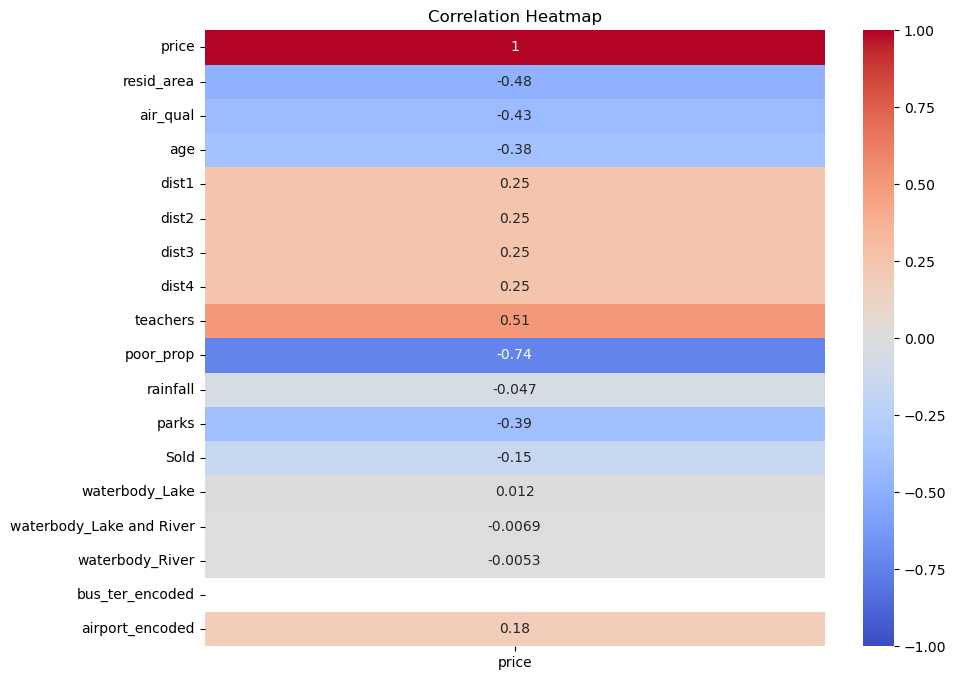

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


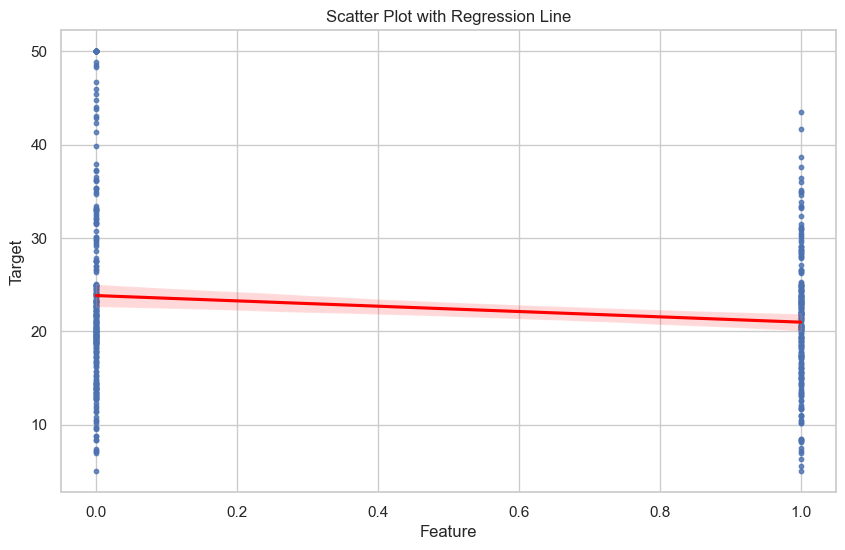

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'feature' is the feature column and 'target' is the target column
sns.set(style="whitegrid")

# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Sold', y='price', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()



C:\Users\USER\anaconda3.2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_14880\645274621.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


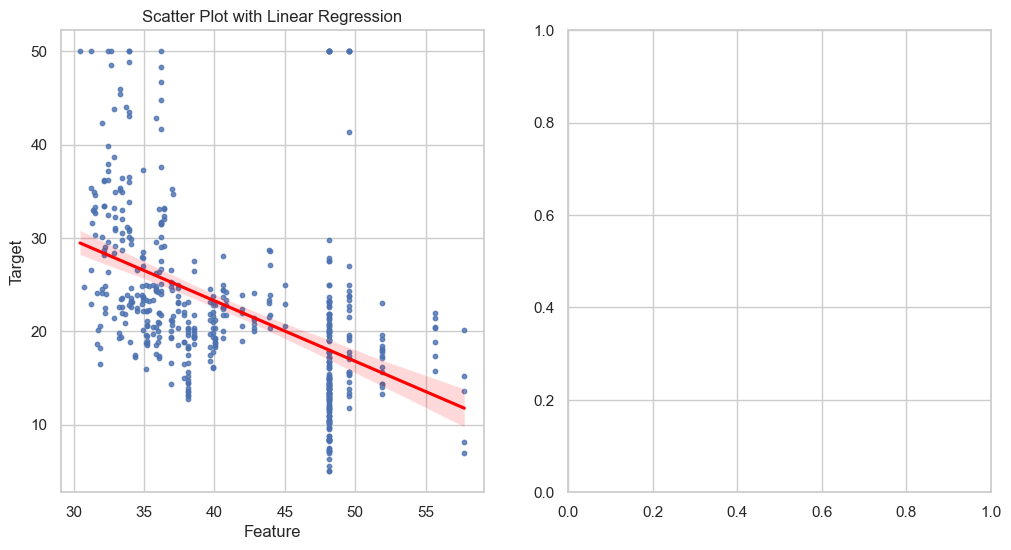

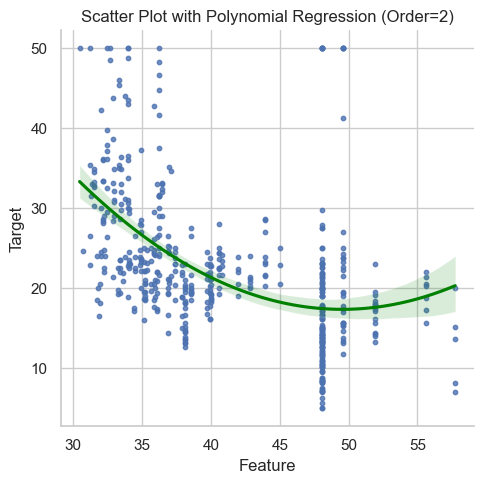

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'feature' is the feature column and 'target' is the target column
sns.set(style="whitegrid")

# Create a scatter plot with a linear regression line
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='resid_area', y='price', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')

# Create a scatter plot with a polynomial regression curve (order=2 for quadratic)
plt.subplot(1, 2, 2)
sns.lmplot(x='resid_area', y='price', data=data, order=2, scatter_kws={'s': 10}, line_kws={'color': 'green'})
plt.title('Scatter Plot with Polynomial Regression (Order=2)')
plt.xlabel('Feature')
plt.ylabel('Target')

plt.tight_layout()
plt.show()


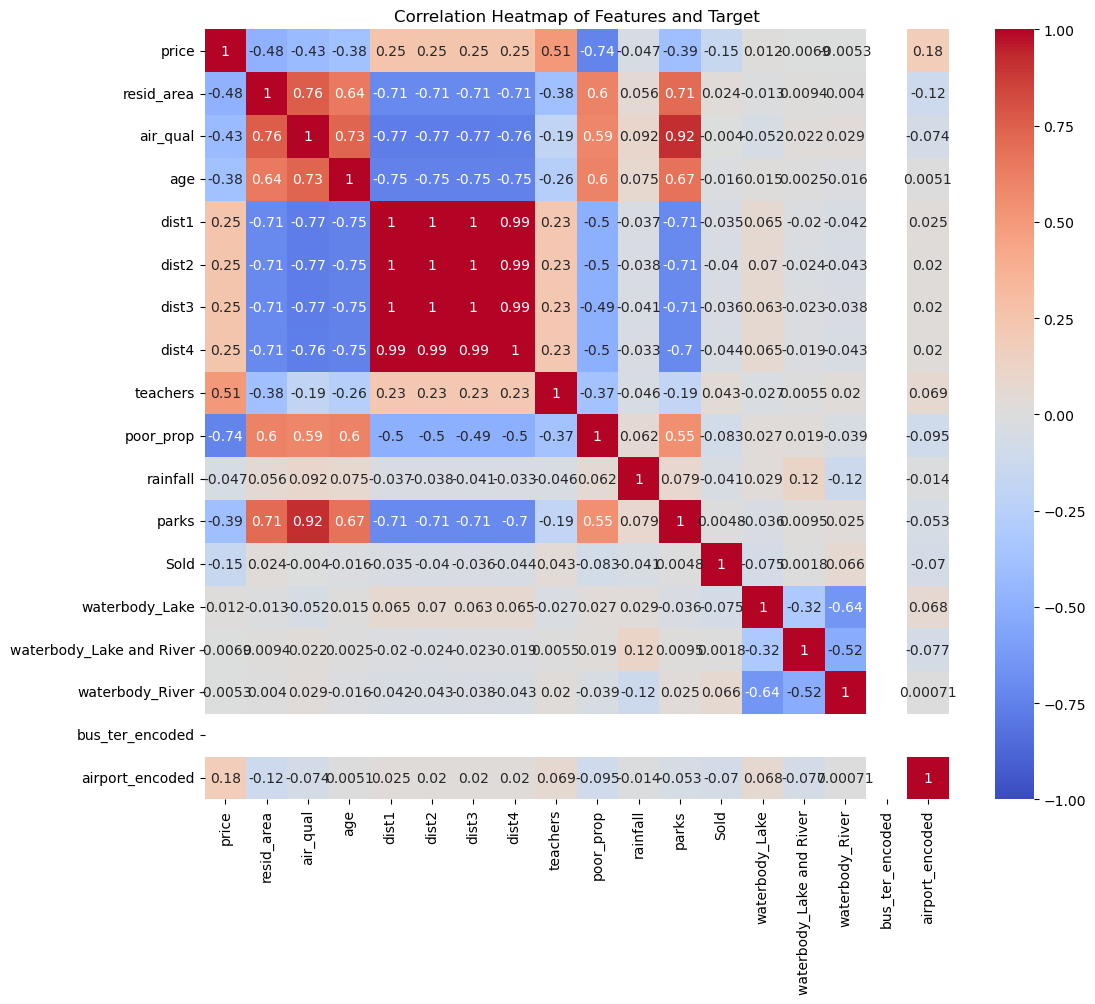

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features and Target')
plt.show()
